<h1 align="center">Volume 4: Total Variation.</h1>

    NAME
    Section #
    DATE

In [21]:
import numpy as np
from scipy.linalg import norm
from numpy.random import random_integers, uniform, randn, randint
import matplotlib.pyplot as plt

from matplotlib import cm
from imageio import imread, imwrite

# Problem 1

Using 20 x steps, 250 time steps, and a final time of .2, plot the solution that
minimizes (17.4). It should match figure 17.1.

Difference in iterations is  0.0
Final time =  0.2


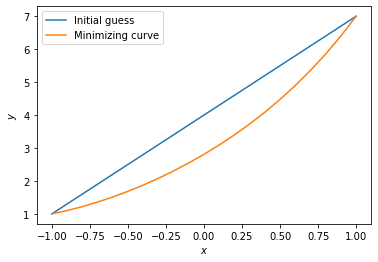

In [22]:
time_steps = 250
x_steps = 20
final_T = .2

a, b = -1, 1
alpha, beta = 1, 7

delta_t, delta_x = final_T / time_steps, (b-a) / x_steps
x0 = np.linspace(a, b, x_steps+1)

if delta_t / delta_x**2 > .5:
    print("stability condition fails")
    
u = np.empty((2, x_steps + 1))
u[0] = (beta-alpha)/(b-a)*(x0-a) + alpha
u[1] = (beta-alpha)/(b-a)*(x0-a) + alpha

def rhs(y):
    yp = (np.roll(y,-1) - np.roll(y,1)) / (2*delta_x)
    ypp = (np.roll(y,-1) - 2*y + np.roll(y,1)) / delta_x**2
    
    y[1:-1] -= delta_t * (1 + yp[1:-1]**2 - 1*y[1:-1]*ypp[1:-1])
    return y
    
iteration = 0
while iteration < time_steps:
    u[1] = rhs(u[1])
    if norm(np.abs((u[0] - u[1]))) < 1e-5: break
    u[0] = u[1]
    iteration+=1
print("Difference in iterations is ", norm(np.abs((u[0] - u[1]))))
print("Final time = ", iteration*delta_t)

plt.plot(x0, np.linspace(1, 7, 21), label='Initial guess')
plt.plot(x0, u[0], label='Minimizing curve')
plt.xlabel(r"$x$")
plt.ylabel(r"$y$")
plt.legend()
plt.show()

# Problem 2

Using 4t = 1e−3, λ = 40, 4x = 1, and 4y = 1, implement the numerical scheme
mentioned above to obtain a solution u. (So Ω = [0, nx] × [0, ny], where nx and ny represent
the number of pixels in the x and y dimensions, respectively.) Take 250 steps in time. Compare
your results with Figure 17.3.

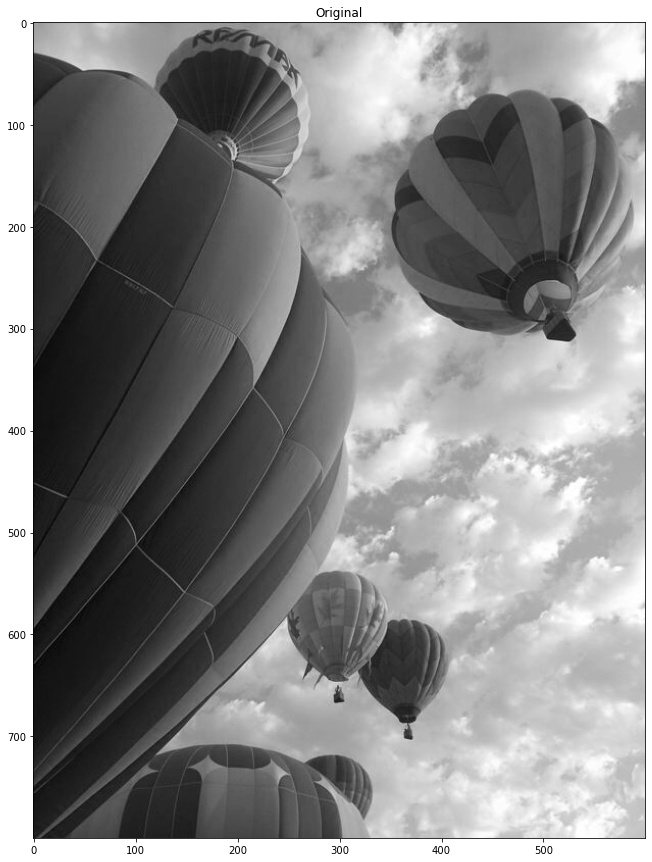

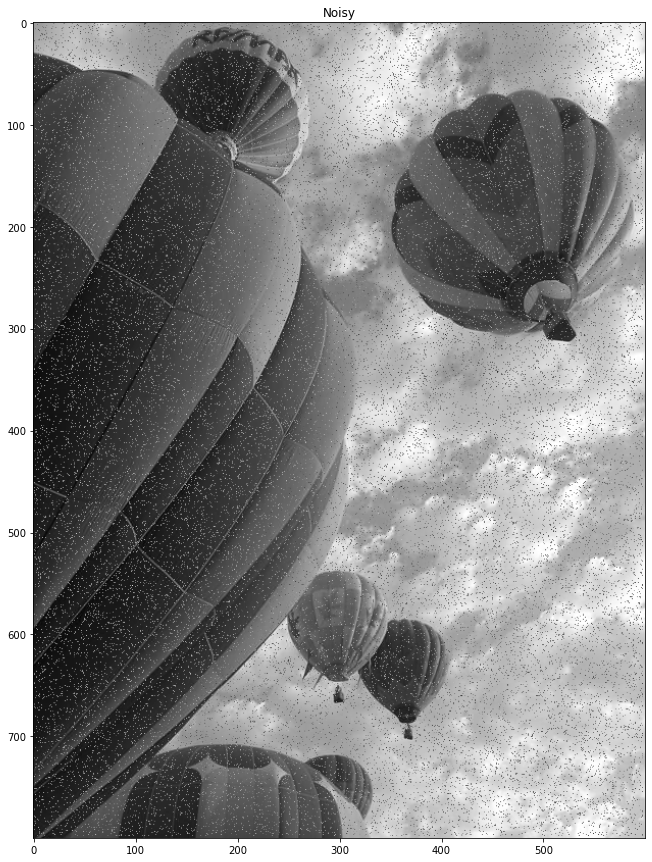

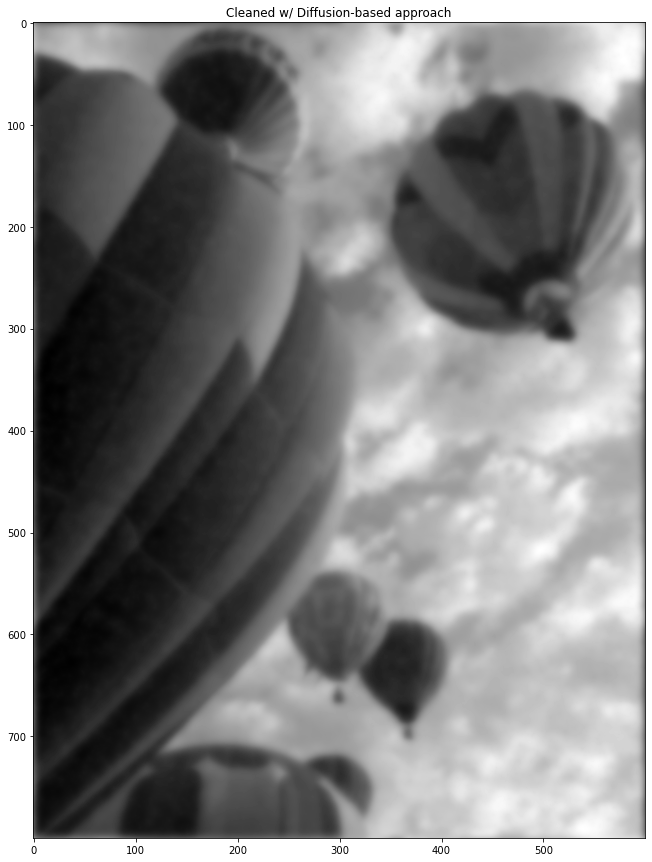

In [28]:
delta_t = 1e-3
lam = 40
time_steps = 250

# Add noise to image
imagename = 'balloons_grey.jpg'
changed_pixels=40000
orig_img = plt.imread(imagename) * (1. / 255)
IM_x, IM_y = orig_img.shape
IM = orig_img.copy()
for lost in range(changed_pixels):
    x_,y_ = randint(1,IM_x-2), randint(1,IM_y-2)
    val = .1*randn() + .5
    IM[x_,y_] = max( min(val,1.), 0.)


# Now do Diffusion based approach

def rhs(u, orig, lam, delta_t):
    u_xx = np.roll(u,-1,axis=1) - 2*u + np.roll(u,1,axis=1)
    u_yy = np.roll(u,-1,axis=0) - 2*u + np.roll(u,1,axis=0)
    return u - (u - orig - lam * (u_xx + u_yy)) * delta_t
    
u = IM.copy()
iteration = 0
while iteration < time_steps:
    u = rhs(u, IM, lam, delta_t)
    iteration += 1
    
# Show original, noisy, clean
plt.rcParams["figure.figsize"] = (20,15)
plt.imshow(orig_img, cmap="gray")
plt.title("Original")
plt.show()
plt.imshow(IM, cmap="gray")
plt.title("Noisy")
plt.show()
plt.imshow(u, cmap="gray")
plt.title("Cleaned w/ Diffusion-based approach")
plt.show()

# Problem 3

Using 4t = 1e − 3, λ = 1, 4x = 1, and 4y = 1, implement the numerical scheme
mentioned above to obtain a solution u. Take 200 steps in time. Compare your results with
Figure 17.3. How small should ε be?

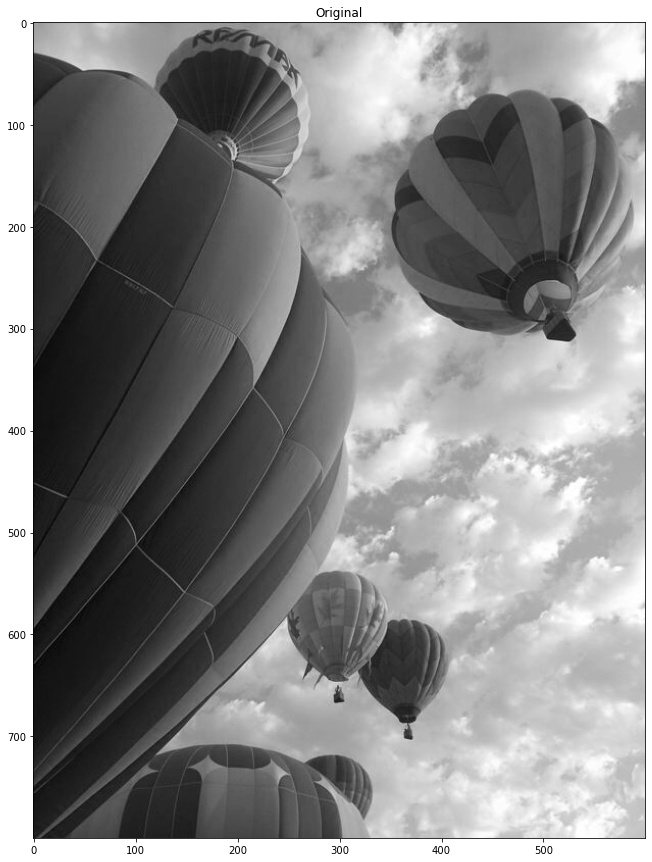

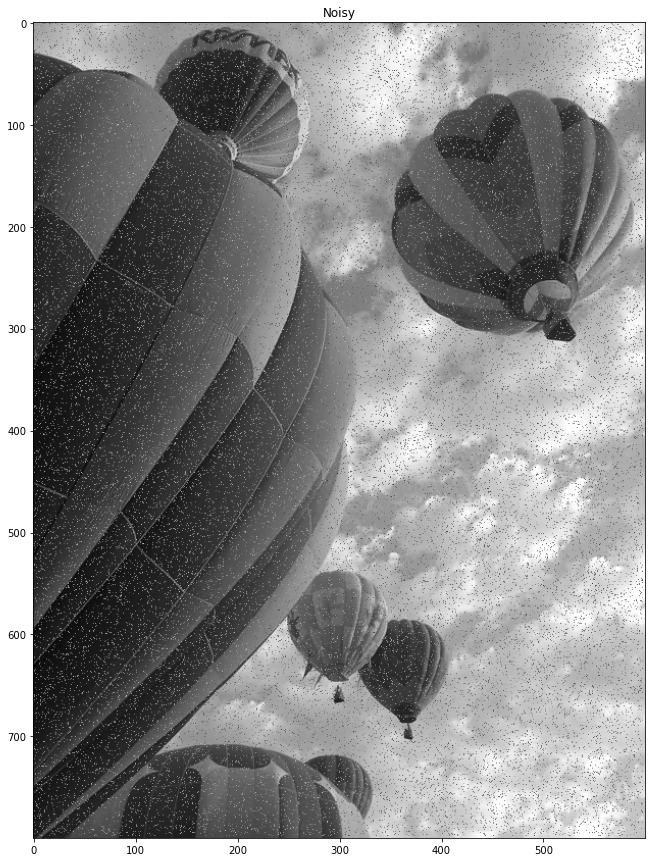

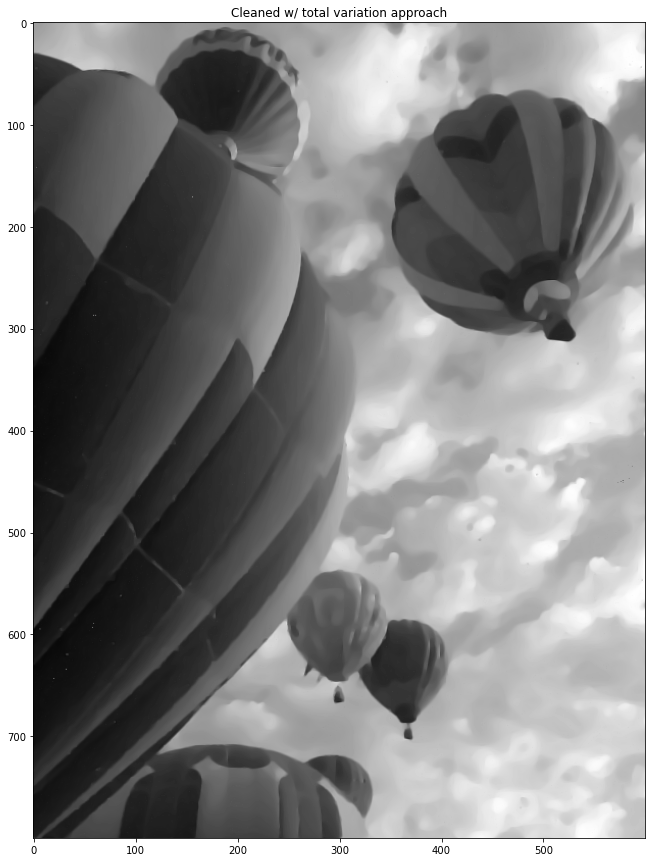

In [29]:
eps = .00001
delta_T = 1e-3
lam = 1

# Add noise to image
imagename = 'balloons_grey.jpg'
changed_pixels=40000
orig_img = plt.imread(imagename) * (1. / 255)
IM_x, IM_y = orig_img.shape
IM = orig_img.copy()
for lost in range(changed_pixels):
    x_,y_ = randint(1,IM_x-2), randint(1,IM_y-2)
    val = .1*randn() + .5
    IM[x_,y_] = max( min(val,1.), 0.)
    
# Total Variation based approach

def func(u, orig, lam):
    ux = (np.roll(u,-1,axis=1) - np.roll(u,1,axis=1))/2
    uy = (np.roll(u,-1,axis=0) - np.roll(u,1,axis=0))/2
    uxx = np.roll(u,-1,axis=1) - 2*u + np.roll(u,1,axis=1)
    uxy = (np.roll(ux,-1,axis=0) - np.roll(ux,1,axis=0))/2
    uyy = np.roll(u,-1,axis=0) - 2*u + np.roll(u,1,axis=0)
    top = uxx * uy**2 + uyy*ux**2 - 2 * ux*uy*uxy
    bot = np.sqrt((ux**2 + uy**2 + eps)**3)
    return (- lam * (u - orig) + top/bot) * delta_T
    
u = IM.copy()
iteration = 0
while iteration < 200:
    u += func(u, IM, lam)
    iteration += 1
    
# Show original, noisy, clean
plt.imshow(orig_img, cmap="gray")
plt.title("Original")
plt.show()
plt.imshow(IM, cmap="gray")
plt.title("Noisy")
plt.show()
plt.imshow(u, cmap="gray")
plt.title("Cleaned w/ total variation approach")
plt.show()